In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table

from astropy import units as u
from astropy.coordinates import SkyCoord

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

## Bottrell
https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/MNRAS/486/390

## Yang07

In [2]:
grps = Table.read("./data/group_DR7/modelA_group", format = 'ascii')

In [3]:
mask_m = (grps['col7'] > np.log10(2e12))
mask_z = (grps['col4'] > 0.015) & (grps['col4'] < 0.055)
mask_coord = ((grps['col2'] < 50) | (grps['col2'] > 300)) & ((grps['col3'] < 5) & (grps['col3'] > -5))
mask_grp = mask_m & mask_z & mask_coord

In [4]:
grps = grps[mask_grp]

In [5]:
ra_grp = grps['col2']
# mask_ra = grps['col2'] > 300
# ra_grp[mask_ra] = ra_grp[mask_ra] - 360

dec_grp = grps['col3']

In [6]:
zz_grp = grps['col4']
dist_grp = cosmo.comoving_distance(zz_grp).value #mpc

In [7]:
coords = SkyCoord(ra = ra_grp * u.degree, dec = dec_grp * u.degree, distance = dist_grp * u.Mpc)

In [8]:
x_grp = coords.cartesian.x
y_grp = coords.cartesian.y
z_grp = coords.cartesian.z

# Calculate

In [9]:
# from scipy.sparse.csgraph import minimum_spanning_tree
# from sklearn.neighbors import kneighbors_graph

from utils.utils import construct_mst, get_graph_degree, get_branch_index, get_branch_end_index

In [10]:
k_neighbours=20
edge_length, edge_x, edge_y, edge_z, edge_index = construct_mst(x_grp, y_grp, z_grp, k_neighbours)

number_of_nodes = len(x_grp)
degree = get_graph_degree(edge_index, number_of_nodes)

index1, index2 = edge_index[0], edge_index[1]
edge_degree = np.array([degree[index1], degree[index2]])

In [12]:
branch_index, rejected_branch_index = get_branch_index(edge_index, edge_degree)

branch_length = [np.sum(edge_length[i]) for i in branch_index]
branch_length = np.array(branch_length)

In [13]:
branch_index_end = get_branch_end_index(edge_index, edge_degree, branch_index)
branch_index_end1, branch_index_end2 = branch_index_end[0], branch_index_end[1]

dx = abs(x_grp[branch_index_end1] - x_grp[branch_index_end2])
dy = abs(y_grp[branch_index_end1] - y_grp[branch_index_end2])
dz = abs(z_grp[branch_index_end1] - z_grp[branch_index_end2])
branch_end_length = np.sqrt((dx ** 2.) + (dy ** 2.) + (dz ** 2.))

branch_shape = branch_end_length/branch_length

In [113]:
# degree, edge_length, branch_length, branch_shape, edge_index, branch_index
# mask_link = edge_length < 6

# edge_index[mask_link]

# edge_length


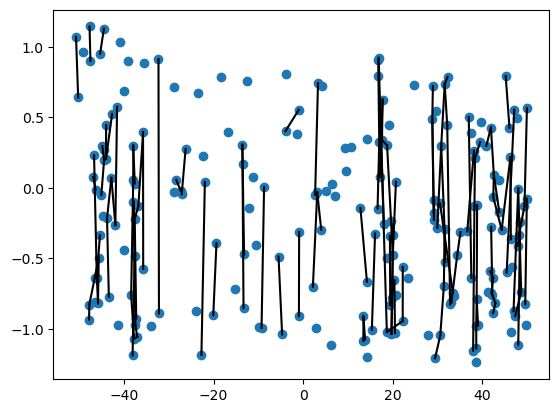

In [117]:
fig, ax = plt.subplots()

# ax.scatter(x_grp, y_grp)

# ax.plot([x_grp[edge_index[0][mask_link]], x_grp[edge_index[1][mask_link]]],
#         [y_grp[edge_index[0][mask_link]], y_grp[edge_index[1][mask_link]]],
#          color = 'k' )

ax.scatter(ra_grp, dec_grp)

ax.plot([ra_grp[edge_index[0][mask_link]], ra_grp[edge_index[1][mask_link]]],
        [dec_grp[edge_index[0][mask_link]], dec_grp[edge_index[1][mask_link]]],
         color = 'k' )

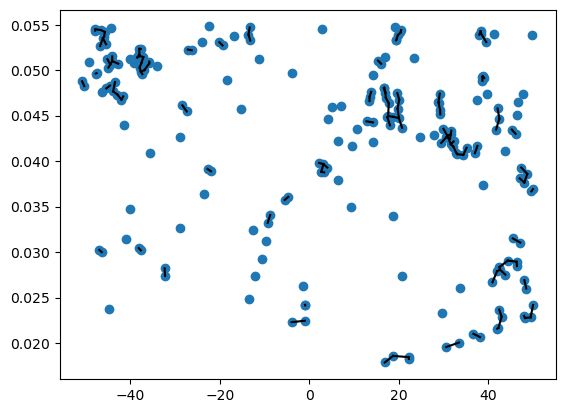

In [119]:
fig, ax = plt.subplots()

# ax.scatter(x_grp, z_grp)

# ax.plot([x_grp[edge_index[0][mask_link]], x_grp[edge_index[1][mask_link]]],
#         [z_grp[edge_index[0][mask_link]], z_grp[edge_index[1][mask_link]]],
#          color = 'k' )

ax.scatter(ra_grp, zz_grp)

ax.plot([ra_grp[edge_index[0][mask_link]], ra_grp[edge_index[1][mask_link]]],
        [zz_grp[edge_index[0][mask_link]], zz_grp[edge_index[1][mask_link]]],
         color = 'k' )

In [142]:
theta_grp = ra_grp * np.pi / 180

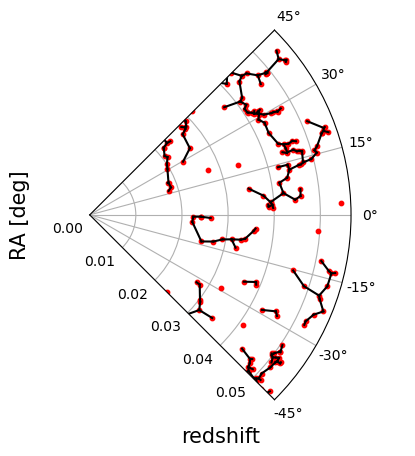

In [150]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

mask_link = edge_length < 20
ax.scatter(theta_grp, zz_grp, s = 10, zorder = 2, color = 'r')

ax.plot([theta_grp[edge_index[0][mask_link]], theta_grp[edge_index[1][mask_link]]],
        [zz_grp[edge_index[0][mask_link]], zz_grp[edge_index[1][mask_link]]],
         color = 'k' )

ax.set_thetalim(-np.pi/4, np.pi/4)

ax.set_xlabel('redshift', fontsize = 15)
ax.set_ylabel('RA [deg]', fontsize = 15)

fig.savefig('result.png')


In [139]:
len(ra_grp)

219